# CS188 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

In [2]:
For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>


SyntaxError: invalid syntax (<ipython-input-2-ef355a664ce2>, line 1)

## Loading Essentials and Helper Functions 

In [221]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score


from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from matplotlib import pyplot
import itertools

%matplotlib inline
import random 
  
random.seed(42) 

In [222]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [223]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## [20 Points] Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [224]:
heartdisease = pd.read_csv("heartdisease.csv")

### Question 1.1 Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method to display some of the rows so we can visualize the types of data fields we'll be working with, then use the describe method, along with any additional methods you'd like to call to better help you understand what you're working with and what issues you might face. 

In [225]:
heartdisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [226]:
heartdisease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [227]:
print(heartdisease.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64


In [228]:
heartdisease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
sick           bool
dtype: object

### Question 1.2 Discuss your data preprocessing strategy. Are their any datafield types that are problemmatic and why? Will there be any null values you will have to impute and how do you intend to do so? Finally, for your numeric and categorical features, what if any, additional preprocessing steps will you take on those data elements?

[Use this area to discuss your data processing strategy] 

The first preprocessing strategies I did were checking the datatypes of each feature as well as checking if there were any null values in the dataset. Luckily, there were no null values in any of the features, so I did not have to take any measures in imputation. 

When reviewing the datatype fields, I saw that the sick label was of type bool. This is problematic because our models do not support predicting a truth value in the essence of the bool true/false. Instead, we need to change this label to be an int64 type. This conversion will also allow us to plot histograms and correlation matrices easier, as the other features are also of a numerical nature. 

The numerical features will have to be normalized during the processing stage. I don't want to weigh any of the features more than the other, and since some features like 'age', 'trestbps', and 'thalac' have means over 50, scaling the features will correctly weigh our input. 

In addition, there are some categorical features that are labelled with numbers, such as 'cp' and 'thal'. I will OneHotEncode these categorical features in my processing stage, as their labels are arbitrary so an absence/prescence feature would be more meaningful than trying to find the relationship between the features' values. 

### Question 1.3  Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe.

In [229]:
heartdisease['sick'] = heartdisease.sick.replace({True: 1, False: 0})

In [230]:
heartdisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


### Question 1.4 Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? (Note: No need to describe each variable, but pick out a few you wish to highlight)

Saving figure Histograms


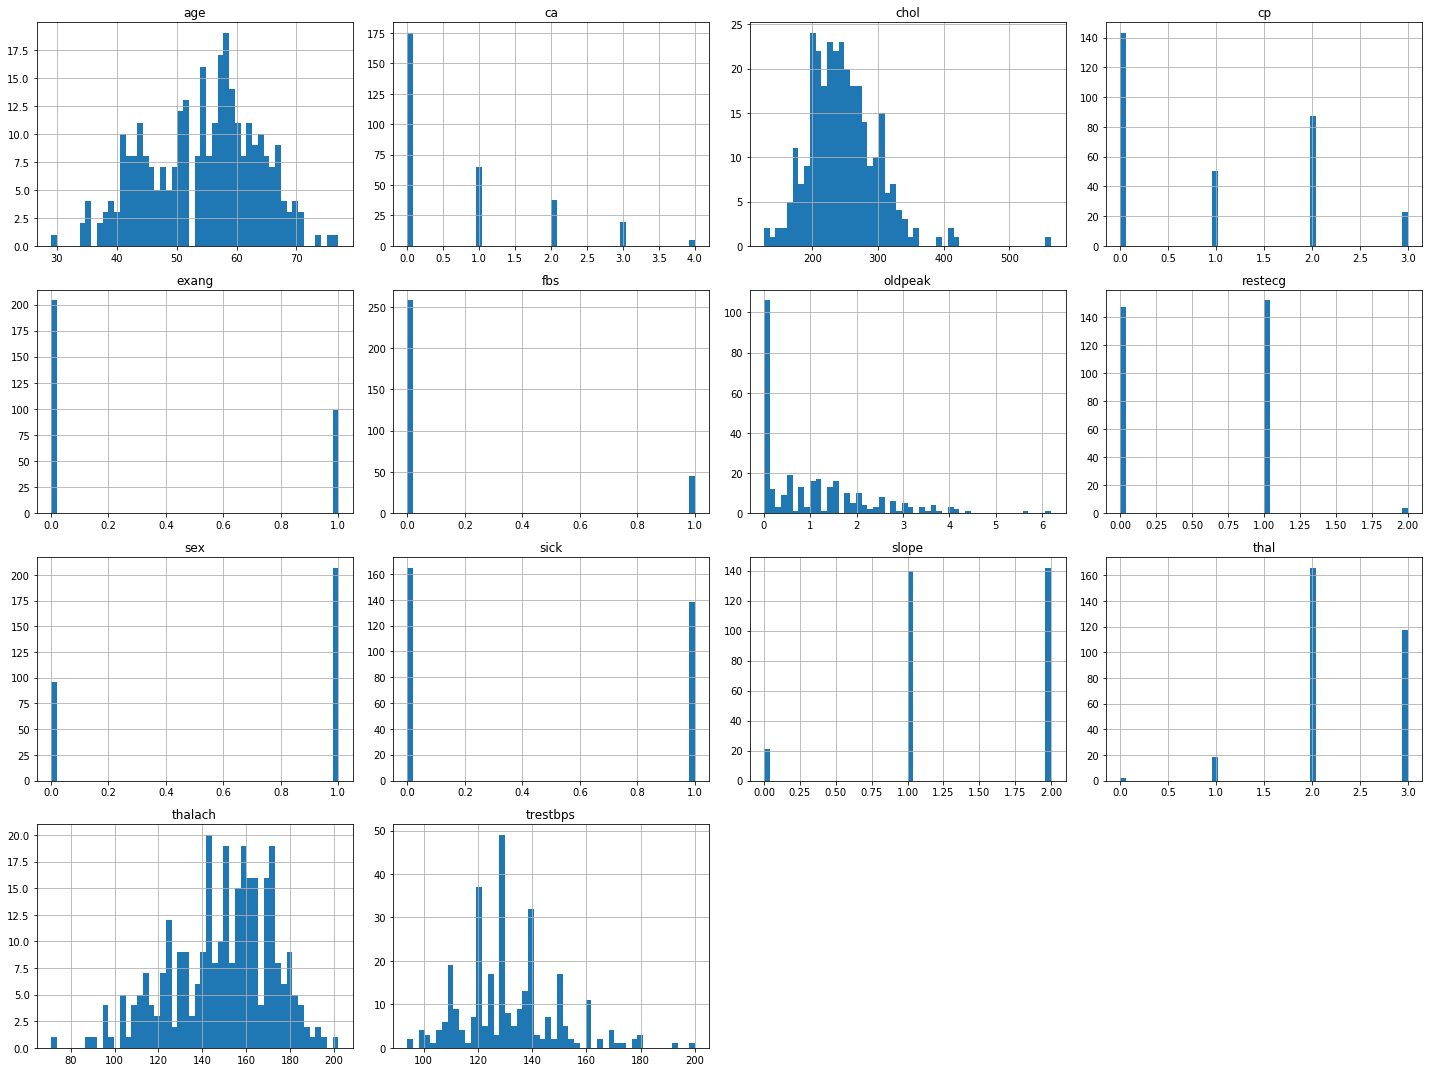

In [231]:
heartdisease.hist(bins=50, figsize=(20,15))
save_fig("Histograms")

ca: This feature is limited selection because there are only five 'bins.' The values do not appear on a float spectrum but as five distinct gropuings. 

trestbps: This feature is gradient. This feature describes resting blood pressure, which can be plotted along the spectrum of natural numbers. Although each number is a bin, there are hundreds of possible values, so the feature values also exist on a spectrum or gradient. Additionally, the relationship between bins is significant, as someone who is unhealthier usually has a higher resting blood pressure than someone who is heathy. 

exang: This feature is binary. A label of 1 is used if the person has exercised induced angina and a 0 if they do not. This is an absense/presence feature. 

### Question 1.5 We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

Saving figure Sick_Healthy_Distribution


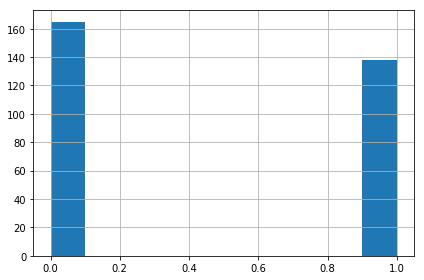

In [232]:
heartdisease['sick'].hist()
save_fig("Sick_Healthy_Distribution")

In [233]:
heartdisease['sick'].value_counts()

0    165
1    138
Name: sick, dtype: int64

There are 165 healthy individuals and 138 sick individuals. This dataset is fairly balanced, as it is approximately a 55/45 split between the two groups.

### Question  1.6 Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

We can artificially balance a dataset by deleting individuals or by adding generated individuals. The problem with deleting individuals is that we may be removing valuable datapoints that display a relationship between certain features and the label. 

If we generate artificial data, we may be creating correlations that do not exist in our original data, which will bias our model and incorrectly train it. 

### Question 1.9 Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

In [234]:
corr_matrix = heartdisease.corr()

In [235]:
corr_matrix["sick"].sort_values(ascending=False)

sick        1.000000
exang       0.436757
oldpeak     0.430696
ca          0.391724
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg    -0.137230
slope      -0.345877
thalach    -0.421741
cp         -0.433798
Name: sick, dtype: float64

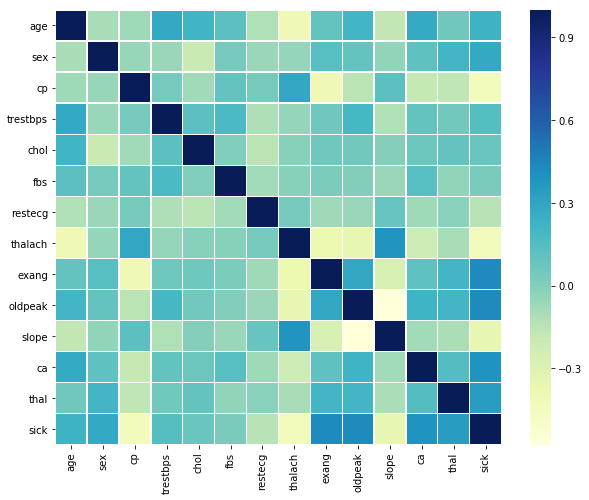

In [236]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, linewidths=.3, cmap="YlGnBu")

The four most positively correlated variables with sickness are exang, oldpeak, ca, and thal. 

It makes sense for exang to be the most correlated with sickness because angina is chest pain caused by reduced blood flow to the heart. If angina occurs during exercise, this could signal that there is a problem with the arteries connecting to the heart, which could be an indicator of heart disease. 

After doing some research, I found a study that showed there was not a strong correlation between oldpeak and heart disease, so it is interesting to me that it is so highly correlated. 

The correlation between ca and sickness makes sense. If someone were to have more vessels colored by fluroroscopy, it most likely means that they were recommended to be tested, which usually signals that a doctor thought they might be at risk for heart disease. 

Lastly, the correlation between thal and sickness is expected. A higher score of thal means that they have thalassemia. Since thal reduces the number of red blood cells as well as the amount of oxygen each red blood cell contains, it makes to me that thal shows a high correlation to heart disease. 

## [30 Points] Part 2. Prepare the Data 

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Question 2.1 Save the target column as a separate array and then drop it from the dataframe. 

In [237]:
sick_df = heartdisease['sick']
heartdisease.drop(['sick'], axis=1, inplace=True)
heartdisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Question 2.2 First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [238]:
X_train, X_test, y_train, y_test = train_test_split(heartdisease, sick_df, test_size=.30, random_state=40)
print("X_train dimension:",X_train.shape)
print("X_test dimension:",X_test.shape)
print("y_train dimension:",y_train.shape)
print("y_test dimension:",y_test.shape)

X_train dimension: (212, 13)
X_test dimension: (91, 13)
y_train dimension: (212,)
y_test dimension: (91,)


### Question 2.3 Now create a pipeline to conduct any additional preparation of the data you would like. Output the resulting array to ensure it was processed correctly.

In [239]:
# cleaning the num features
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

numerical_features = ["age", "sex", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["cp", "fbs", "restecg", "exang", "slope", "thal", "ca"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(categories='auto'), categorical_features)
    ])

### Question 2.4 Now create a separate, processed training data set by dividing your processed dataframe into training and testing cohorts, using the same settings as Q2.2 (REMEMBER TO USE DIFFERENT TRAINING AND TESTING VARIABLES SO AS NOT TO OVERWRITE YOUR PREVIOUS DATA). Output the resulting shapes of your training and testing samples to confirm that your split was successful, and describe what differences there are between your two training datasets.

In [240]:
heartdisease_prepared = full_pipeline.fit_transform(heartdisease)

print(heartdisease_prepared.shape)
X_prep_train, X_prep_test, y_prep_train, y_prep_test = train_test_split(heartdisease_prepared, sick_df, test_size=.30, random_state=40)

print("X_prep_train dimension:",X_prep_train.shape)
print("X_prep_test dimension:",X_prep_test.shape)

(303, 29)
X_prep_train dimension: (212, 29)
X_prep_test dimension: (91, 29)


[What differences are there between these two datasets?]

In my processed dataset, I picked seven features to OneHotEncode. Even though the features were numerical, I concluded that their values were arbitrary and more closely resembled a categorical feature. My original dataset only had 13 features and my processed dataset has 29 features. I essentially doubled the amount of features for the model to look at, which hopefully will result in a more accurate prediction. 

## [50 Points] Part 3. Learning Methods 

We're finally ready to actually begin classifying our data. To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Question 3.1.1 Implement a Support Vector Machine classifier on your RAW dataset. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [241]:
# SVM

clf = SVC(gamma='auto', probability=True)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
score = clf.predict_proba(X_test)

### Question 3.1.2 Report the accuracy, precision, recall, F1 Score, and confusion matrix of the resulting model.

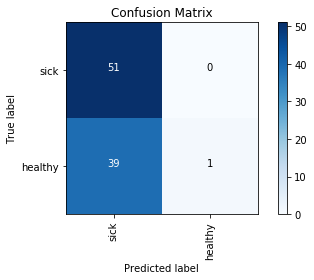

Accuracy:    0.571429
Precision:   1.000000
Recall:      0.025000
F1 Score:    0.048780


In [242]:
draw_confusion_matrix(y_test, preds, ['sick', 'healthy'])

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, preds)))
print("%-12s %f" % ('Precision:',metrics.precision_score(y_test, preds)))
print("%-12s %f" % ('Recall:',metrics.recall_score(y_test, preds)))
print("%-12s %f" % ('F1 Score:',metrics.f1_score(y_test, preds)))

### Question 3.1.3 Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

Accuracy is measuring how many of our predictions we got right. This is equal to (TP+TN)/(TP+FP+TN+FN). This metric is significant because it tells us the extent to which our model is predicting our labels correctly.
    
Precision takes into account true positives and false positives. It is calculated with (TP)/(TP+FP). This metric is concerned about how many of our positive predictions were correct. It does not take into account the false negative rate. 
    
Recall: Recall takes into account true positives and false negatives. It is calculated with (TP)/(TP+FN). This metric is concerned about how how many true positives we mislabeled.
    
F1 takes into account true positives, false positives, and false negatives. It is the weighted average of precision and recall and is calculated with 2\*(Recall\*Precision\*)/(Recall+Precision). This metric is concerned with how many overall errors we are making.

If we care more about true positives and true negatives, we should use accuracy. We would use accuracy as a metric in marketing and advertising. Our goal is to maximize profits, maximizing true positives is important. On the other hand, false positives and false negatives can be disregarded, as sending the wrong ads to someone will not bring revenue down. 

If we care more about false positives, we should use precision. One case of this is email spam filtering. In this situation, we care more about the false positives because we want to ensure that important emails like college acceptances and event invitations are not sent to spam. A few spam emails entering our main inbox (false negatives) is okay because we can just delete them.

If we care more about false negatives, we should use recall. One situation where we could use recall is for preganancy tests. Here, we care a lot about misclassifying someone who is pregnant because someone who does not know they are pregnant could act in ways (smoking, drinking) that could lead to adverse health risks for the child. If we misclassify someone who is not pregnant, the risks aren't as great because a child's life is not at risk.

If we care more about both false positives and false negatives, we should use F1. A situation for this would be creating a model that predicts breast cancer. We care about false positives because we do not want to recommend chemotherapy to someone who is healthy and we also care about false negatives because we do not want someone who has cancer to think they are healthy.

### Question 3.1.4 Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

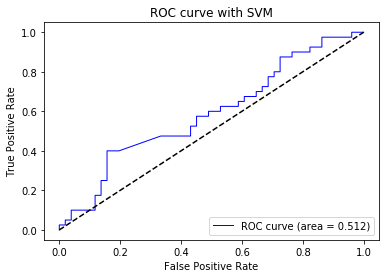

In [243]:
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, score[:, 1], pos_label=1)
roc_auc = roc_auc_score(y_test, preds)

pyplot.figure(1)
plt.plot(fpr_svm, tpr_svm, label='ROC curve (area = %0.3f)' % roc_auc, color='blue', lw=1)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve with SVM")
plt.legend(loc="lower right")
pyplot.show()

[Describe what an ROC Curve is and what the results mean here] 

An ROC Curve is a plot of the TPR (True Positive Rate) against the FRP (False Positive Rate) at different thresholds. The area under the ROC Curve measures how useful the model will be when tested with general data. The maximum AUC (Area Under the Curve) is 1.0, which means that the model will perform very well with general data, as it is able to distinguish between a large amount of true and false positives at a low threshold value.

For this dataset, a good AUC means that our model will be able to distinguish between sick and healthy indivuduals with a low rate of false positives and false negatives. My AUC is around 0.5, which means that my model has no ability to classify the classes. Its performance is just as good as if it were guessing each individual's health. 

### Question 3.1.5 Rerun, using the exact same settings, only this time use your processed data as inputs. 

In [244]:
clf_processed = SVC(gamma='auto', probability=True)
clf_processed.fit(X_prep_train, y_prep_train)
preds = clf_processed.predict(X_prep_test)
score = clf_processed.predict_proba(X_prep_test)

### Question 3.1.6 Report the accuracy, precision, recall, F1 Score, confusion matrix, and plot the ROC Curve of the resulting model.

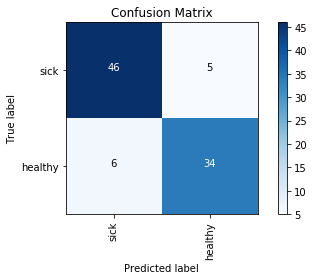

Accuracy:    0.879121
Precision:   0.871795
Recall:      0.850000
F1 Score:    0.860759


In [245]:
draw_confusion_matrix(y_prep_test, preds, ['sick', 'healthy'])

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, preds)))
print("%-12s %f" % ('Precision:',metrics.precision_score(y_test, preds)))
print("%-12s %f" % ('Recall:',metrics.recall_score(y_test, preds)))
print("%-12s %f" % ('F1 Score:',metrics.f1_score(y_test, preds)))

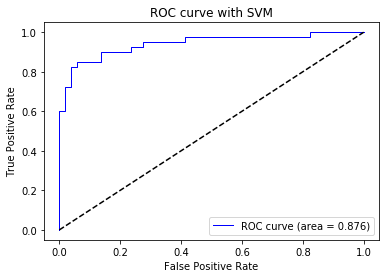

In [246]:
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, score[:, 1], pos_label=1)
roc_auc = roc_auc_score(y_prep_test, preds)

pyplot.figure(1)
plt.plot(fpr_svm, tpr_svm, label='ROC curve (area = %0.3f)' % roc_auc, color='blue', lw=1)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve with SVM")
plt.legend(loc="lower right")
pyplot.show()

### Question 3.1.7 Hopefully you've noticed a dramatic change in performance. Discuss why you think your new data has had such a dramatic impact. 

I believe my new data had such a dramatic impact because we more than doubled the number of features for the model to learn from. This gave the model more options to find relations from. For example, by OneHotEncoding seven features, the model was able to interpret them as binary instead of trying to find a numerical relationship between their values. Since the labeling was arbitrary for the categorical features, the model was most likely fighting itself when it was trying to learn from those features. However, after OneHotEncoding them and scaling the numerical features, the model was able to learn from a less skewed and better represented dataset. 

### Question 3.1.8 Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [247]:
# SVM

clf_processed = SVC(probability=True, gamma='auto', kernel='linear')
clf_processed.fit(X_prep_train, y_prep_train)
preds = clf_processed.predict(X_prep_test)
score = clf_processed.predict_proba(X_prep_test)


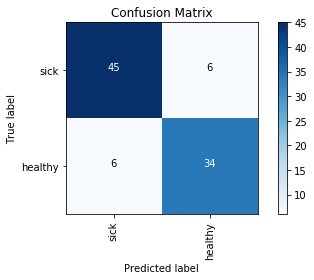

Accuracy:    0.868132
Precision:   0.850000
Recall:      0.850000
F1 Score:    0.850000


In [248]:
draw_confusion_matrix(y_prep_test, preds, ['sick', 'healthy'])

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, preds)))
print("%-12s %f" % ('Precision:',metrics.precision_score(y_test, preds)))
print("%-12s %f" % ('Recall:',metrics.recall_score(y_test, preds)))
print("%-12s %f" % ('F1 Score:',metrics.f1_score(y_test, preds)))

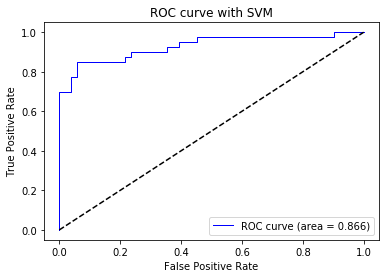

In [249]:
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, score[:, 1], pos_label=1)
roc_auc = roc_auc_score(y_prep_test, preds)

pyplot.figure(1)
plt.plot(fpr_svm, tpr_svm, label='ROC curve (area = %0.3f)' % roc_auc, color='blue', lw=1)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve with SVM")
plt.legend(loc="lower right")
pyplot.show()

### Question 3.1.9 Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

The new results had a lower accuracy, precision, recall, and f1 score. This means that changing the kernel to linear made our model worse. Changing the kernel parameter changes what algorithm is used transform input data into higher dimensions. Since the new results are worse, this means that the linear kernel mapped our data to a less separable output than if we had the parameter as rbf. 

### Logistic Regression

Knowing that we're dealing with a linearly configured dataset, let's now try another classifier that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Question 3.2.1 Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. For this initial model set the solver = 'sag' and max_iter= 10). Report on the same four metrics as the SVM and graph the resulting ROC curve.

In [250]:
# Logistic Regression

clf_processed = LogisticRegression(solver='sag', max_iter=10)
clf_processed.fit(X_prep_train, y_prep_train)
preds = clf_processed.predict(X_prep_test)
score = clf_processed.predict_proba(X_prep_test)

C:\Users\kayts\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


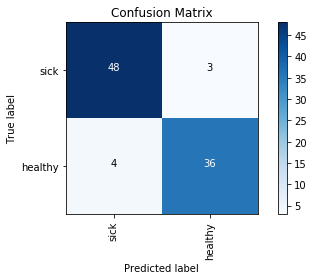

Accuracy:    0.923077
Precision:   0.923077
Recall:      0.900000
F1 Score:    0.911392


In [251]:
draw_confusion_matrix(y_prep_test, preds, ['sick', 'healthy'])

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, preds)))
print("%-12s %f" % ('Precision:',metrics.precision_score(y_test, preds)))
print("%-12s %f" % ('Recall:',metrics.recall_score(y_test, preds)))
print("%-12s %f" % ('F1 Score:',metrics.f1_score(y_test, preds)))

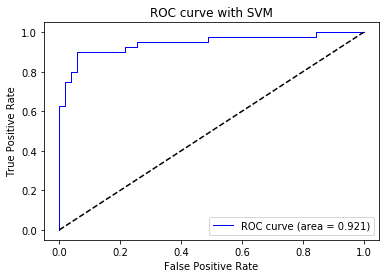

In [252]:
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, score[:, 1], pos_label=1)
roc_auc = roc_auc_score(y_prep_test, preds)

pyplot.figure(1)
plt.plot(fpr_svm, tpr_svm, label='ROC curve (area = %0.3f)' % roc_auc, color='blue', lw=1)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve with SVM")
plt.legend(loc="lower right")
pyplot.show()

### Question 3.2.2 Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [253]:
# Logistic Regression

clf_processed = LogisticRegression(solver='sag', max_iter=1000)
clf_processed.fit(X_prep_train, y_prep_train)
preds = clf_processed.predict(X_prep_test)
score = clf_processed.predict_proba(X_prep_test)

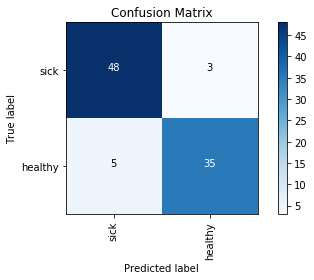

Accuracy:    0.912088
Precision:   0.921053
Recall:      0.875000
F1 Score:    0.897436


In [254]:
draw_confusion_matrix(y_prep_test, preds, ['sick', 'healthy']) 

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, preds)))
print("%-12s %f" % ('Precision:',metrics.precision_score(y_test, preds)))
print("%-12s %f" % ('Recall:',metrics.recall_score(y_test, preds)))
print("%-12s %f" % ('F1 Score:',metrics.f1_score(y_test, preds)))

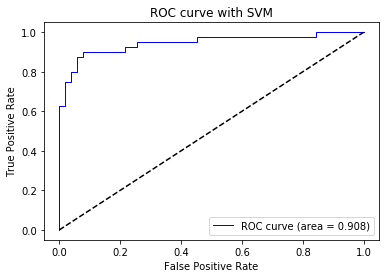

In [255]:
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, score[:, 1], pos_label=1)
roc_auc = roc_auc_score(y_prep_test, preds)

pyplot.figure(1)
plt.plot(fpr_svm, tpr_svm, label='ROC curve (area = %0.3f)' % roc_auc, color='blue', lw=1)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve with SVM")
plt.legend(loc="lower right")
pyplot.show()

### Question 3.2.3 Explain what you changed, and why that produced an improved outcome. 

I increased the max_iter to 1000. This produced an improved outcome because it allowed enough iterations for the coefficient to converge. Since we saw that our data was largely separable from the SVM models, we expect that the logistic regression should converge. As such, we only needed to increase the amount of iterations it should run to allow the model time to converge the coefficient. 

### Question 3.2.4 Rerun your logistic classifier, but modify the penalty = 'none', solver='sag' and again report the results.

In [256]:
# Logistic Regression

clf_processed = LogisticRegression(penalty='none', solver='sag', max_iter=1000)
clf_processed.fit(X_prep_train, y_prep_train)
preds = clf_processed.predict(X_prep_test)
score = clf_processed.predict_proba(X_prep_test)

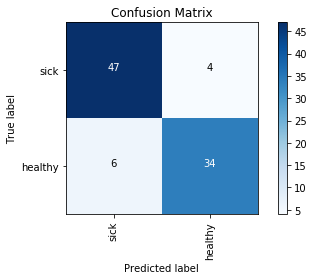

Accuracy:    0.890110
Precision:   0.894737
Recall:      0.850000
F1 Score:    0.871795


In [257]:
draw_confusion_matrix(y_prep_test, preds, ['sick', 'healthy'])

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, preds)))
print("%-12s %f" % ('Precision:',metrics.precision_score(y_test, preds)))
print("%-12s %f" % ('Recall:',metrics.recall_score(y_test, preds)))
print("%-12s %f" % ('F1 Score:',metrics.f1_score(y_test, preds)))

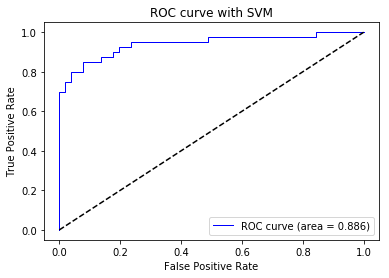

In [258]:
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, score[:, 1], pos_label=1)
roc_auc = roc_auc_score(y_prep_test, preds)

pyplot.figure(1)
plt.plot(fpr_svm, tpr_svm, label='ROC curve (area = %0.3f)' % roc_auc, color='blue', lw=1)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve with SVM")
plt.legend(loc="lower right")
pyplot.show()

### Question 3.2.5 Explain what what the penalty parameter is doing in this function, what the solver method is, and why this combination likely produced a more optimal outcome. 

Setting the penalty parameter to none removes any regularization from happening to our model. For my model, removing reguliarzation produced a less optimal outcome. Removing any form of penalty can cause our model to overfit our data. While this usually produces more accurate results for our training set, it can also lead to worse performance when used on more general data. Since removing regularization worsened my outcome, my model was most likely overfitting to the training set. 

However, removing any penalty can result in more optimal outcomes if the training data is very similar to test data. In this case, any form of penalty might be preventing the model from reaching the most optimal regression. Removing regularization would then allow the model to freely optimize the regression that best fits the training and test data. 

A solver method of 'sag' is a stochastic average gradient descent. A 'sag' updates the parameters for each training example one by one. It also bakes in previous iterations with the current data point, which results in a faster and more optimal convergence.

### Question 3.2.6 Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

SVM tries to split the data by computing a hyperplane. This is found by evaluating margins as the model is being trained. It classifies elements based on where they fall in relation to the hyperplane.

A Logistic Regression calculates the odds ratio of a label using a probability function. It then plots the result along a sigmoid or logistic graph and classifies the element based on where it falls above or below the sigmoid/logistic function. 

### Clustering Approaches 

Let us now try a different approach to classification using a clustering algorithm. Specifically, we're going to be using K-Nearest Neighbor, one of the most popular clustering approaches. 

### K-Nearest Neighbor  

### Question 3.3.1 Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [259]:
# k-Nearest Neighbors algorithm

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_prep_train, y_prep_train)

pred = knn.predict(X_prep_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_prep_test, pred)))

Accuracy:    0.824176


### Question 3.3.2 For clustering algorithms, we use different measures to determine the effectiveness of the model. Specifically here, we're interested in the Homogeneity Score, Completeness Score, V-Measure, Adjusted Rand Score, and Adjusted Mutual Information. Calculate each score (hint review the SKlearn Metrics Clustering documentation for how to implement).

In [260]:
print("%-28s %f" % ('Homogeneity Score:', metrics.homogeneity_score(y_prep_test, pred)))
print("%-28s %f" % ('Completeness Score:', metrics.completeness_score(y_prep_test, pred)))
print("%-28s %f" % ('V Measure:', metrics.v_measure_score(y_prep_test, pred)))
print("%-28s %f" % ('Adjusted Rand Score:', metrics.adjusted_rand_score(y_prep_test, pred)))
print("%-28s %f" % ('Adjusted Mutual Info Score:', metrics.adjusted_mutual_info_score(y_prep_test, pred)))

Homogeneity Score:           0.322257
Completeness Score:          0.329284
V Measure:                   0.325733
Adjusted Rand Score:         0.413849
Adjusted Mutual Info Score:  0.320127


### Question 3.3.3 Explain what each score means and interpret the results for this particular model. 

The Homogeneity Score describes how uniform the clustering is. A homogeneity score of 0.32 means that the classes in our cluster were not very uniform. 

The Completeness Score describes to what extent a cluster captured the elements of a specific class. Our completeness score of 0.33 means that our cluster was not capturing all the elements of our class. Our clustering most likely consisted of around 50% sick and 50% healthy. 

The V-measure Score describes how well the cluster was at accurately capturing elements of a specific class without misclassifying others. The V-measure score is the harmonic average of the homogeneity and completeness score. Our V-measure Score of 0.33 illustrates that our cluster was not very good at correctly labeling sick people and healthy correctly. 

The Adjusted Rand Score describes how well our clusters were at correctly labeling elements. An ARI of 0.41 means our model was only labeling 41% of our elements correctly in terms of clustering. This is a bit different from the classification accuracy metric because the adjusted rand score is modified for clustering.  

The Ajusted Mutual Info Score also describes how well our clusters were at correctly labeling elements but is corrected for small unbalanced clusters. An AMI score of 0.32 means our model was only correctly labeling around a third of the elements based off the assumption that our clustering labels were small and unbalanced.

As we're beginning to see, the input parameters for your model can dramatically impact the performance of the model. How do you know which settings to choose? Studying the models and studying your datasets are critical as they can help you anticipate which models and settings are likely to produce optimal results. However sometimes that isn't enough, and a brute force method is necessary to determine which parameters to use. For this next question we'll attempt to optimize a parameter using a brute force approach. 

### Question 3.3.4 Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 10, 20, 50, and 100. Run your model for each value and report the 6 measures (5 clustering specific plus accuracy) for each. Report on which n value produces the best accuracy and V-Measure. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [261]:
neighbors = [1,2,3,5,10,20,50,100]

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_prep_train, y_prep_train)
    pred = knn.predict(X_prep_test)
    print("Neighbors = ", neighbor)
    print("%-28s %f" % ('Accuracy:', metrics.accuracy_score(y_prep_test, pred)))
    print("%-28s %f" % ('Homogeneity Score:', metrics.homogeneity_score(y_prep_test, pred)))
    print("%-28s %f" % ('Completeness Score:', metrics.completeness_score(y_prep_test, pred)))
    print("%-28s %f" % ('V Measure:', metrics.v_measure_score(y_prep_test, pred)))
    print("%-28s %f" % ('Adjusted Rand Score:', metrics.adjusted_rand_score(y_prep_test, pred)))
    print("%-28s %f" % ('Adjusted Mutual Info Score:', metrics.adjusted_mutual_info_score(y_prep_test, pred)))
    print("\n")

Neighbors =  1
Accuracy:                    0.791209
Homogeneity Score:           0.253155
Completeness Score:          0.260581
V Measure:                   0.256814
Adjusted Rand Score:         0.331764
Adjusted Mutual Info Score:  0.250611


Neighbors =  2
Accuracy:                    0.791209
Homogeneity Score:           0.263913
Completeness Score:          0.289193
V Measure:                   0.275975
Adjusted Rand Score:         0.331570
Adjusted Mutual Info Score:  0.269729


Neighbors =  3
Accuracy:                    0.835165
Homogeneity Score:           0.348975
Completeness Score:          0.359212
V Measure:                   0.354020
Adjusted Rand Score:         0.443136
Adjusted Mutual Info Score:  0.348628


Neighbors =  5
Accuracy:                    0.824176
Homogeneity Score:           0.322257
Completeness Score:          0.329284
V Measure:                   0.325733
Adjusted Rand Score:         0.413849
Adjusted Mutual Info Score:  0.320127


Neighbors =  10
Accu

20 Neighbors produced the best accuracy and V-measure. The accuracy was 85.7% and the V-measure score was 40.5%. 

### Question 3.3.5 When are clustering algorithms most effective, and what do you think  explains the comparative results we achieved?  

Clustering algorithms are most effective when elements of a class display similar characteristics. I believe KNN was able to achieve accuracy comparative to SVM and the Logistic Regression because the data was separable and clusterable. For example, people who were at risk for heart disease were most likely older, had a higher resting blood pulse, and most likely had angina of some sort. This most likely created a clustering of sick individuals that our KNN model was able to identiy when giving an optimal n value. As such, our knn was able to achieve results comparable to our SVM and Logistic Regression. 